In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Bidirectional, LSTM, Dense, Dropout, Flatten, Embedding,Reshape,TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from keras import layers
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/OCR/OCR Data/integrate_2.csv')
label=df['Label']

In [ ]:
df.shape

(998431, 2)

In [4]:
import zipfile
import io


with zipfile.ZipFile('/content/drive/MyDrive/OCR/OCR Data/New folder.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
images = []

for i in range(570749):
    img_dir = f'New folder/{i}.png'
    try:
        img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

        height, original_width = img.shape
        if 25 - original_width > 0:
            add_width = (25 - original_width) / 2
            left_columns = int(add_width)
            right_columns = int(add_width)
            new_width = 25
            new_img = np.zeros((height, new_width), dtype=np.uint8)
            new_img[:, left_columns:left_columns + original_width] = img
            new_img = cv2.resize(new_img, (new_width, 30))
        else:
            new_img = cv2.resize(img, (25, 30))

        _, binary_image = cv2.threshold(new_img, 128, 255, cv2.THRESH_BINARY)
        images.append(binary_image)
    except Exception as e:
        print(f"Error processing image {i}.png:", str(e))

In [6]:
len(images)

570749

In [ ]:
len(df)

998431

In [ ]:
len(label)

998431

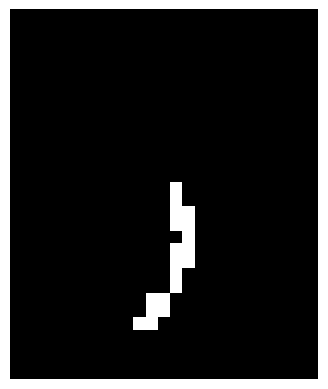

ر


In [7]:
i=570748
plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(label[i])

In [8]:
images = images[:570749]
label = label[:570749]

In [ ]:
len(label)

570749

In [9]:
label_map = {}
current_label = 0
numeric_labels = []

for char in label:
    if char not in label_map:
        # If not, assign a new label
        label_map[char] = current_label
        current_label += 1
    numeric_labels.append(label_map[char])

In [10]:
label_map

{'ر': 0,
 'ا': 1,
 'ﯾ': 2,
 'ﻧ': 3,
 'ﻪ': 4,
 'ﻗ': 5,
 'ﭘ': 6,
 'ن': 7,
 'د': 8,
 'ﺗ': 9,
 'پ': 10,
 'ز': 11,
 'ﻫ': 12,
 'ل': 13,
 'ﺳ': 14,
 'و': 15,
 'م': 16,
 'ﺣ': 17,
 'ﻣ': 18,
 'ط': 19,
 'آ': 20,
 'ﭼ': 21,
 'ﻓ': 22,
 'ه': 23,
 'ﺑ': 24,
 'ی': 25,
 'ﮐ': 26,
 'ﻟ': 27,
 'ژ': 28,
 'ﺟ': 29,
 'ﺧ': 30,
 'ﻻ': 31,
 'ﺻ': 32,
 'ص': 33,
 'ﺷ': 34,
 'ت': 35,
 'ﮔ': 36,
 'ف': 37,
 'ک': 38,
 'ع': 39,
 'ﻌ': 40,
 'ﻬ': 41,
 'ذ': 42,
 'ح': 43,
 'س': 44,
 'گ': 45,
 'خ': 46,
 'ش': 47,
 'ﺿ': 48,
 'ﻋ': 49,
 'ب': 50,
 'ظ': 51,
 'ﻏ': 52,
 'ض': 53,
 'ق': 54,
 'ج': 55,
 'چ': 56,
 'ﺋ': 57,
 'غ': 58,
 'ث': 59,
 'ﺛ': 60,
 'ﻐ': 61,
 'ﻳ': 62,
 '7': 63,
 '3': 64,
 '2': 65,
 '9': 66,
 '8': 67,
 '6': 68,
 '5': 69,
 '4': 70,
 '1': 71,
 '0': 72}

In [ ]:
len(label_map)

73

In [ ]:
print(label[1523])
print(numeric_labels[1523])

د
8


In [11]:
one_hot_labels = to_categorical(numeric_labels)
print("Shape of One-Hot Encoded Labels:", one_hot_labels.shape)

Shape of One-Hot Encoded Labels: (570749, 73)


In [12]:
from sklearn.utils import shuffle

imgs, OHL = shuffle(images, one_hot_labels, random_state=42)

In [13]:
del images
del one_hot_labels


50


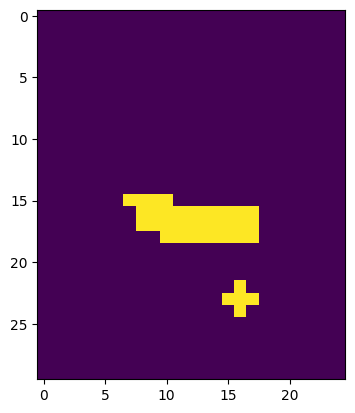

In [ ]:
plt.imshow(imgs[15162])
print(np.argmax(OHL[15162]))

In [ ]:
len(label.unique())

73

In [14]:
imgs=np.expand_dims(imgs,axis=-1)
imgs = np.array(imgs)
imgs = imgs / 255.0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(imgs, OHL, test_size=0.2, random_state=42,shuffle=False)

In [16]:
del imgs
del OHL

In [17]:
def LeNet5(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, kernel_size=(3, 2), strides=(1, 1), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [18]:
input_shape = (30, 25, 1)
num_classes = len(label.unique())
NN = LeNet5(input_shape, num_classes)

In [19]:
NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 23, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 14, 11, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 9, 64)         18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 4, 64)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 3, 128)         49280     
                                                                 
 flatten (Flatten)           (None, 1536)              0

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history = NN.fit(X_train, y_train, epochs=15, batch_size=32,
                         validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/15
14269/14269 [==============================] - 116s 8ms/step - loss: 0.6609 - accuracy: 0.8780 - val_loss: 0.5031 - val_accuracy: 0.9082
Epoch 2/15
14269/14269 [==============================] - 109s 8ms/step - loss: 0.4924 - accuracy: 0.9103 - val_loss: 0.4838 - val_accuracy: 0.9115
Epoch 3/15
14269/14269 [==============================] - 128s 9ms/step - loss: 0.4676 - accuracy: 0.9127 - val_loss: 0.4671 - val_accuracy: 0.9135
Epoch 4/15
14269/14269 [==============================] - 112s 8ms/step - loss: 0.4545 - accuracy: 0.9136 - val_loss: 0.4589 - val_accuracy: 0.9142
Epoch 5/15
14269/14269 [==============================] - 110s 8ms/step - loss: 0.4457 - accuracy: 0.9143 - val_loss: 0.4580 - val_accuracy: 0.9142
Epoch 6/15
14269/14269 [==============================] - 114s 8ms/step - loss: 0.4394 - accuracy: 0.9149 - val_loss: 0.4546 - val_accuracy: 0.9141
Epoch 7/15
14269/14269 [==============================] - 101s 7ms/step - loss: 0.4333 - accuracy: 0.9153 - val_

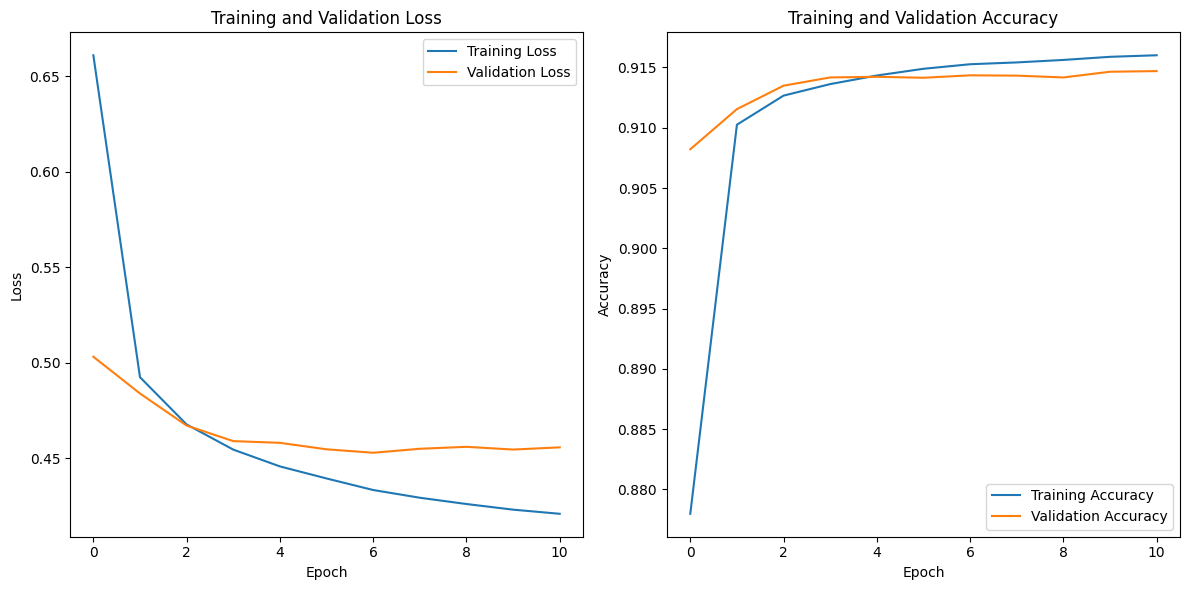

In [21]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

****Test The Model****

In [22]:
predictions=NN.predict(X_test,32)

3568/3568 [==============================] - 10s 3ms/step


In [23]:
print(np.argmax(predictions[48]))
print(np.argmax(y_test[48]))

24
24


In [24]:
print(np.argmax(predictions[12]))
print(np.argmax(y_test[12]))

40
40


In [25]:
NN.evaluate(X_test,y_test)

3568/3568 [==============================] - 18s 5ms/step - loss: 0.4528 - accuracy: 0.9143


[0.45282065868377686, 0.9143495559692383]

In [26]:
# NN.save('ocr-NN',save_format='h5')
NN.save('LeNet5.h5')
